# Sydney Energy Workshop 2025: Accessing BOM RCM data.
## BOM weather and climate data can be accessed using NCI  [THREDDS](https://thredds.nci.org.au/thredds/catalog/catalog.html) Data Server using OPeNDAP. We will access:
* BARRA2 Data
* BARPA Data

# Access BARRA2
### Navigate through the directories to find the dataset you are interested in.

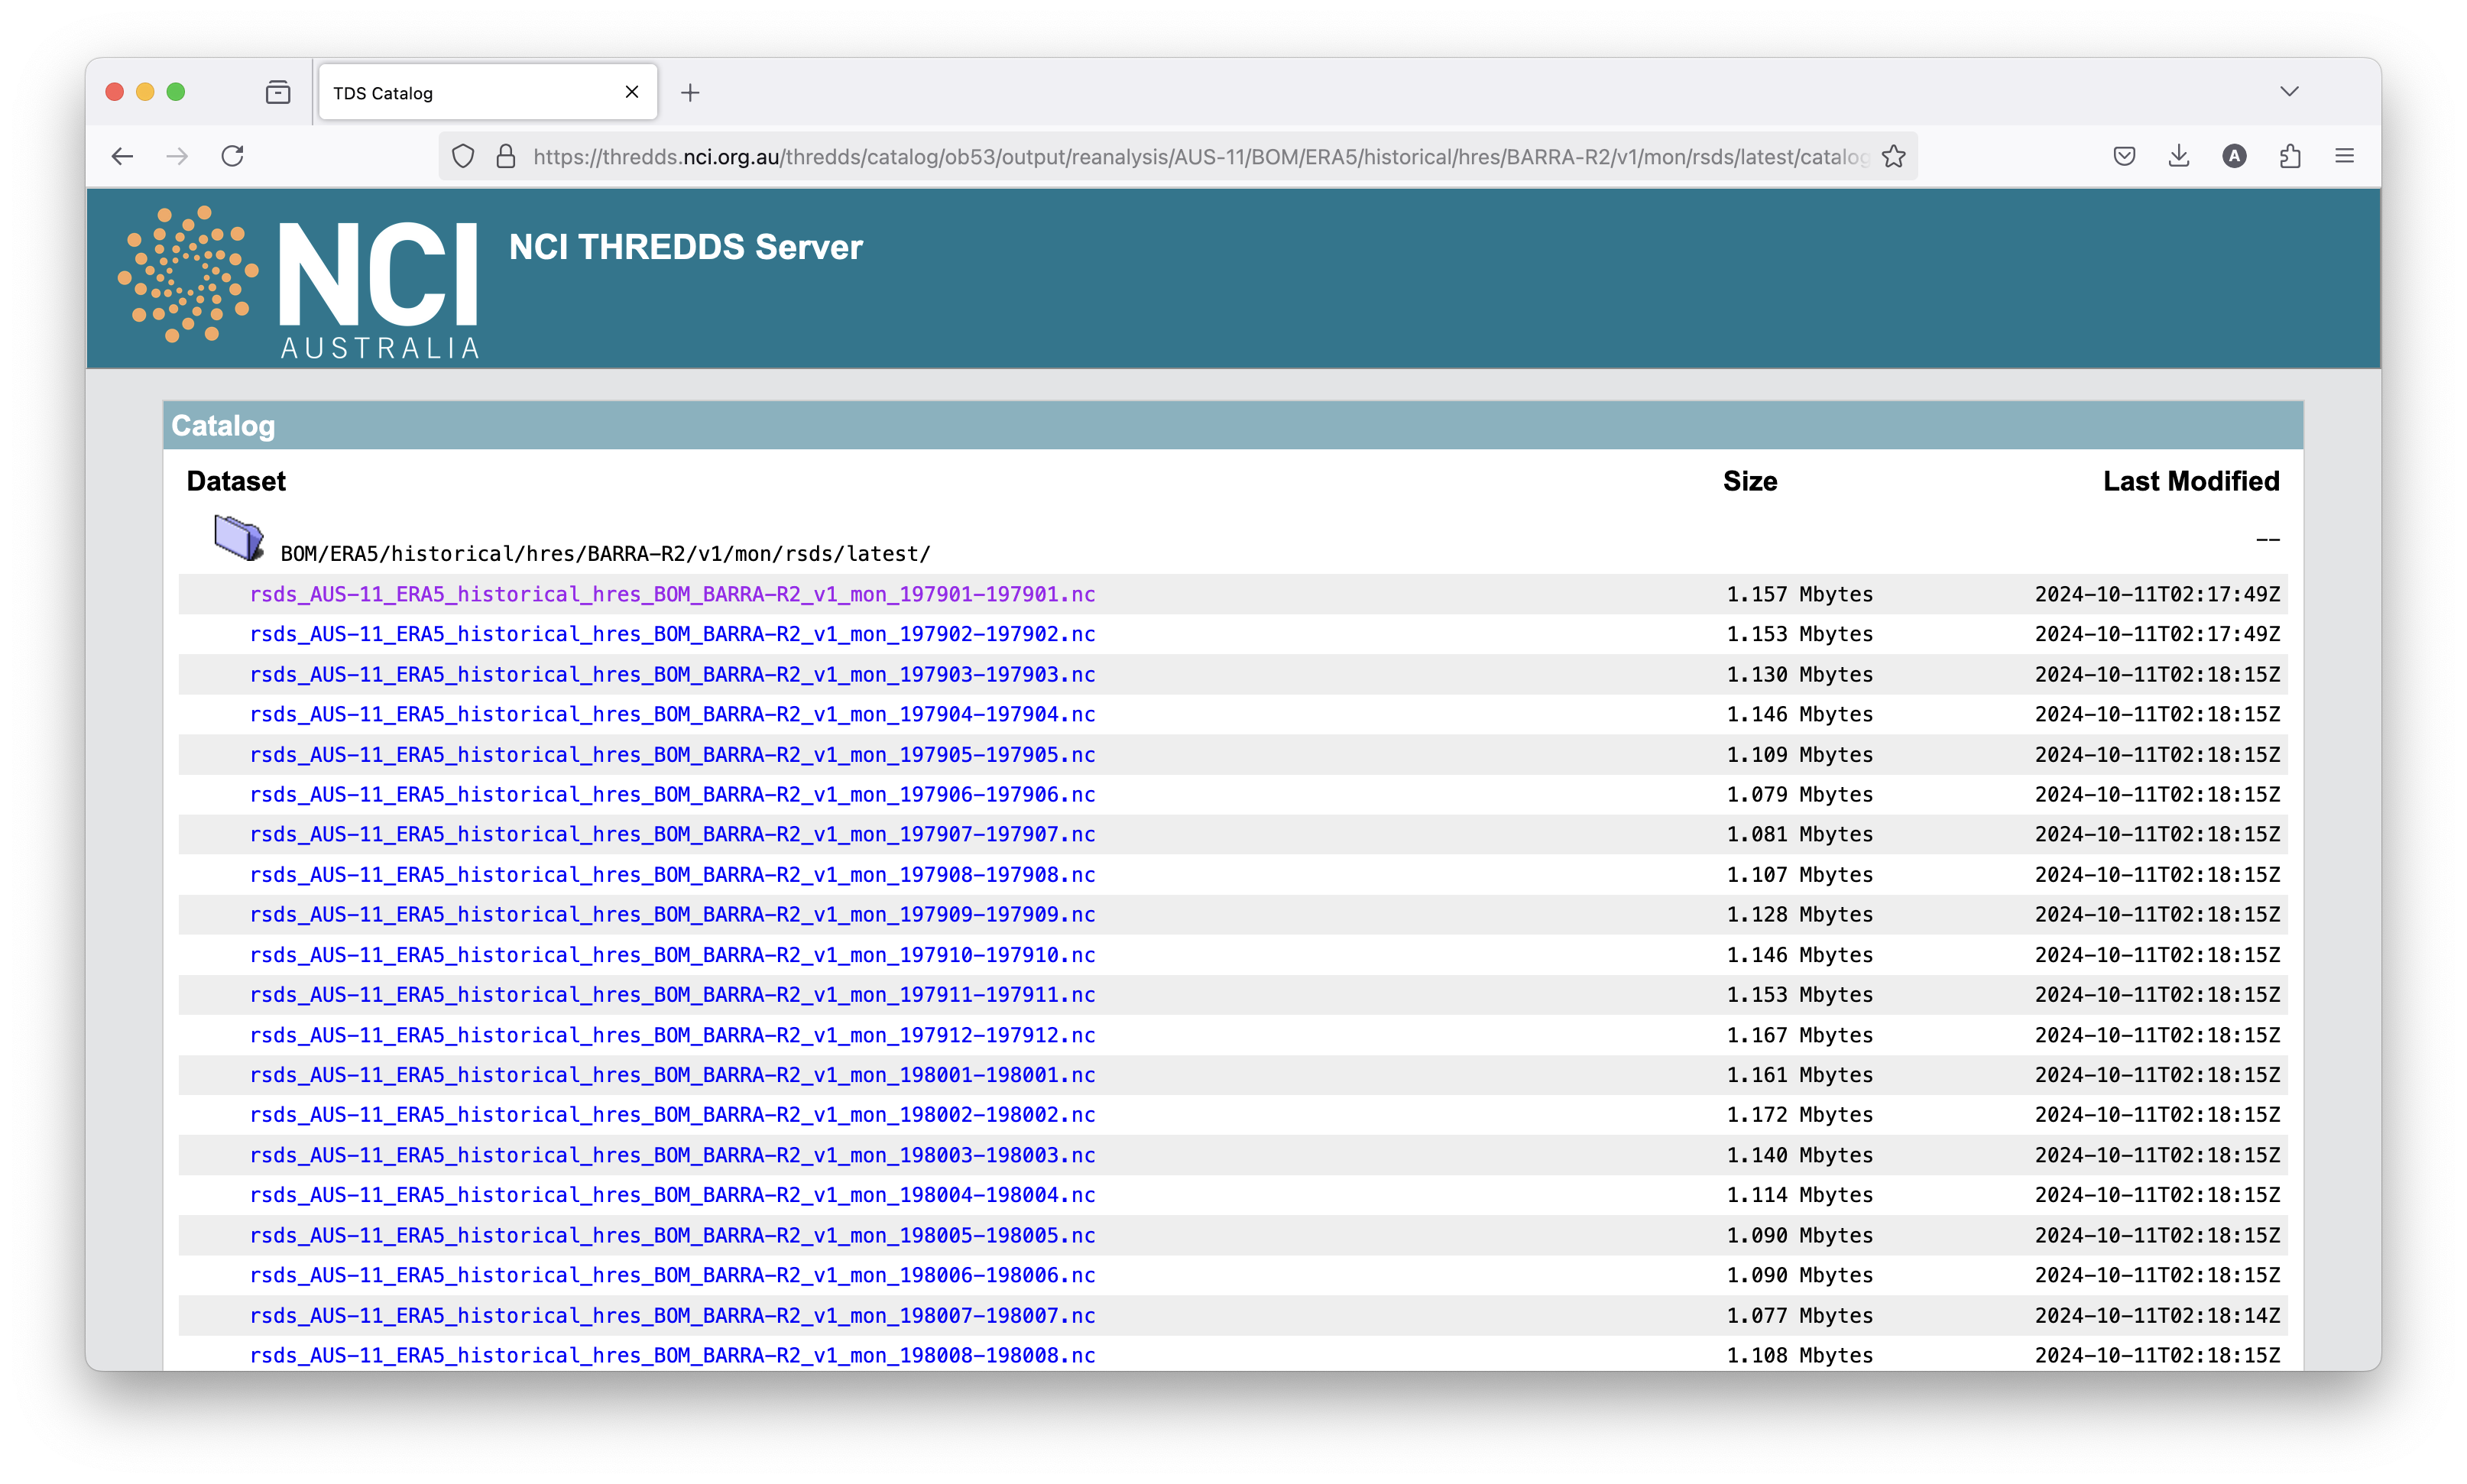

### Copy the url import all relevant modules

In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

### Read url in xarray

In [2]:
ds = xr.open_dataset('https://thredds.nci.org.au/thredds/dodsC/ob53/output/reanalysis/AUS-11/BOM/ERA5/historical/hres/BARRA-R2/v1/mon/rsds/latest/rsds_AUS-11_ERA5_historical_hres_BOM_BARRA-R2_v1_mon_197901-197901.nc')
ds

<xarray.Dataset> Size: 6MB
Dimensions:    (time: 1, lat: 646, lon: 1082, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 8B 1979-01-16T12:00:00
  * lat        (lat) float64 5kB -57.97 -57.86 -57.75 ... 12.76 12.87 12.98
  * lon        (lon) float64 9kB 88.48 88.59 88.7 88.81 ... 207.2 207.3 207.4
  * bnds       (bnds) float64 16B 0.0 1.0
    crs        int32 4B ...
Data variables:
    rsds       (time, lat, lon) float64 6MB ...
    time_bnds  (time, bnds) datetime64[ns] 16B ...
Attributes: (12/60)
    axiom_version:                   0.1.0
    axiom_schemas_version:           0.1.0
    axiom_schema:                    cordex-1M.json
    productive_version:              edfab29
    variable_version:                v20231001
    Conventions:                     CF-1.10, ACDD-1.3
    ...                              ...
    geospatial_lat_units:            degrees_north
    geospatial_lon_min:              88.48
    geospatial_lon_max:              207.39
    geospatial_lon_units:            degrees_east
    history:                         Sat May 04 16:04:20 2024: /g/data/access...
    DODS_EXTRA.Unlimited_Dimension:  time

### Do a quick plot

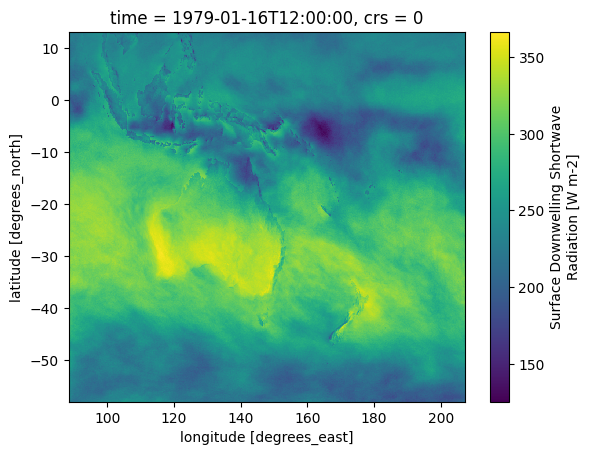

In [3]:
ds.rsds.plot()

### Replot using Robinson Projection

Text(0.5, 1.0, 'January 1979')

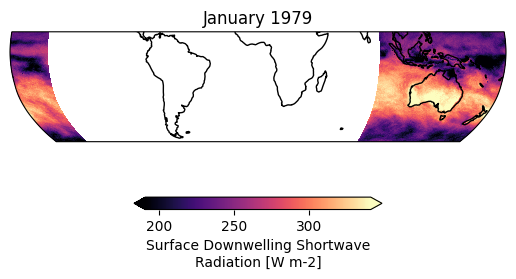

In [4]:
fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Robinson()))

ds.rsds.plot(
    ax=axis,
    transform=ccrs.PlateCarree(), 
    cbar_kwargs={"orientation": "horizontal", "shrink": 0.5},
    robust=True,
    cmap="magma"
)
axis.coastlines() 
axis.set_title("January 1979")

### Oops. Get bounds

In [5]:
lat_min, lat_max = ds.lat.min().item(), ds.lat.max().item()
lon_min, lon_max = ds.lon.min().item(), ds.lon.max().item()

print(f"Latitude bounds: {lat_min} to {lat_max}")
print(f"Longitude bounds: {lon_min} to {lon_max}")


Latitude bounds: -57.97 to 12.98
Longitude bounds: 88.48 to 207.39


### Plot with bounds

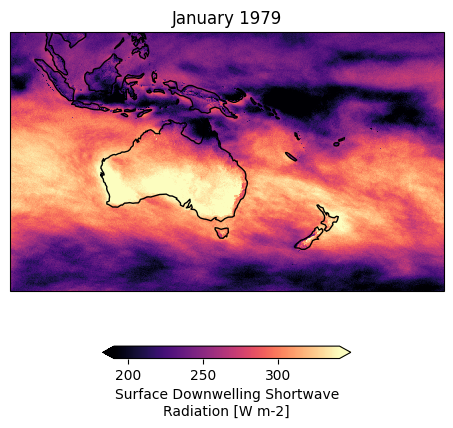

In [6]:
fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180)))

ds.rsds.plot(
    ax=axis,
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"orientation": "horizontal", "shrink": 0.5},
    robust=True,
    cmap="magma"
)


axis.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
axis.coastlines()
axis.set_title("January 1979")
plt.show()


### Plot for NSW (nsw_bbox = [141.0, -37.5, 153.7, -28.0])

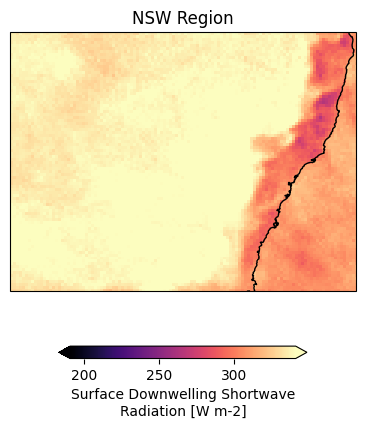

In [40]:
# Define bounds for NSW
lat_minf, lat_maxf = -37.5, -28  # Latitude range for NSW
lon_minf, lon_maxf = 141, 153.7  # Longitude range for NSW, dateline-centered

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180)))

ds.rsds.plot(
    ax=axis,
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"orientation": "horizontal", "shrink": 0.5},
    robust=True,
    cmap="magma"
)


axis.set_extent([lon_minf, lon_maxf, lat_minf, lat_maxf], crs=ccrs.PlateCarree())
axis.coastlines()
axis.set_title("NSW Region")
plt.show()


# Access BARPA2
### Navigate through the directories to find the dataset you are interested in.

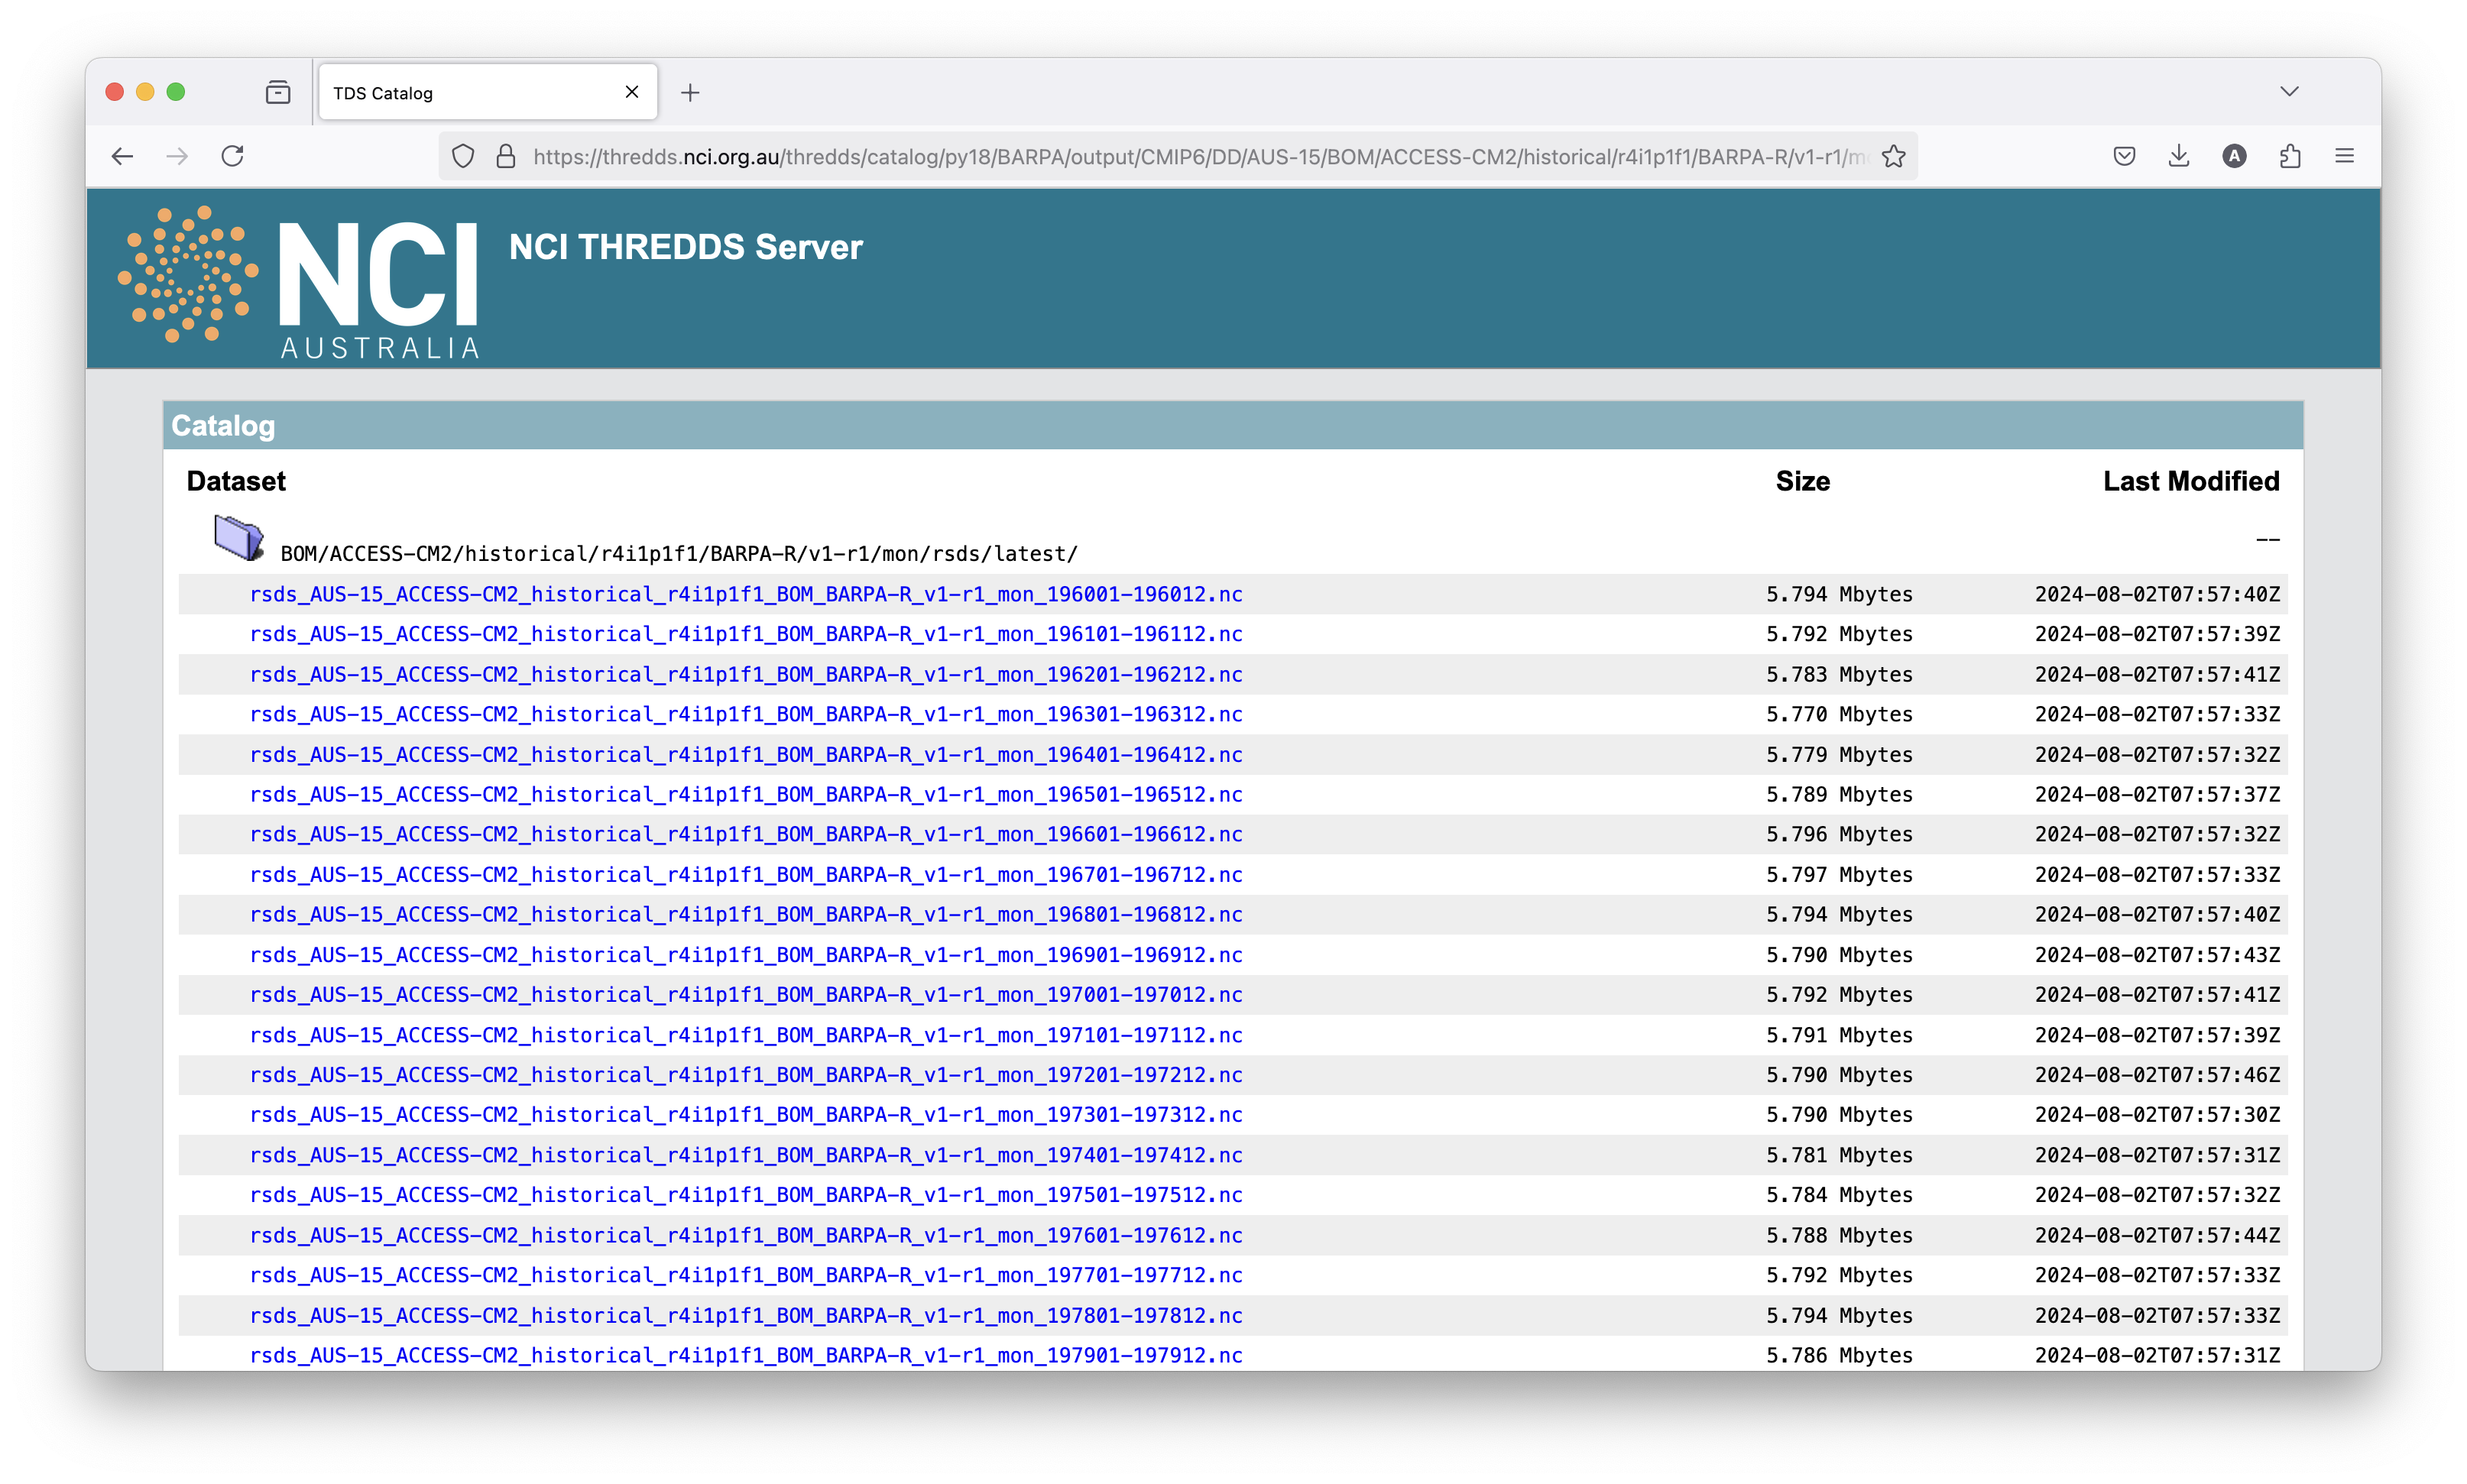

### Copy the url and read in xarray

In [41]:
dn = xr.open_dataset('https://thredds.nci.org.au/thredds/dodsC/py18/BARPA/output/CMIP6/DD/AUS-15/BOM/ACCESS-CM2/historical/r4i1p1f1/BARPA-R/v1-r1/mon/rsds/latest/rsds_AUS-15_ACCESS-CM2_historical_r4i1p1f1_BOM_BARPA-R_v1-r1_mon_196001-196012.nc')
dn

<xarray.Dataset> Size: 33MB
Dimensions:    (time: 12, bnds: 2, lat: 436, lon: 777)
Coordinates:
  * time       (time) datetime64[ns] 96B 1960-01-16T12:00:00 ... 1960-12-16T1...
  * lat        (lat) float64 3kB -53.58 -53.42 -53.27 ... 13.32 13.48 13.63
  * lon        (lon) float64 6kB 88.04 88.19 88.34 88.5 ... 207.6 207.8 207.9
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 192B ...
    crs        int32 4B ...
    rsds       (time, lat, lon) float64 33MB ...
Attributes: (12/62)
    axiom_version:                   0.1.0
    axiom_schemas_version:           0.1.0
    axiom_schema:                    cordex-1M.json
    Conventions:                     CF-1.11, ACDD-1.3
    activity_id:                     DD
    title:                           Bureau of Meteorology Atmospheric Region...
    ...                              ...
    geospatial_lat_units:            degrees_north
    geospatial_lon_min:              88.0355
    geospatial_lon_max:              207.9275
    geospatial_lon_units:            degrees_east
    history:                         Thu Jun 20 09:43:23 2024: /g/data/access...
    DODS_EXTRA.Unlimited_Dimension:  time

### Do a quick plot

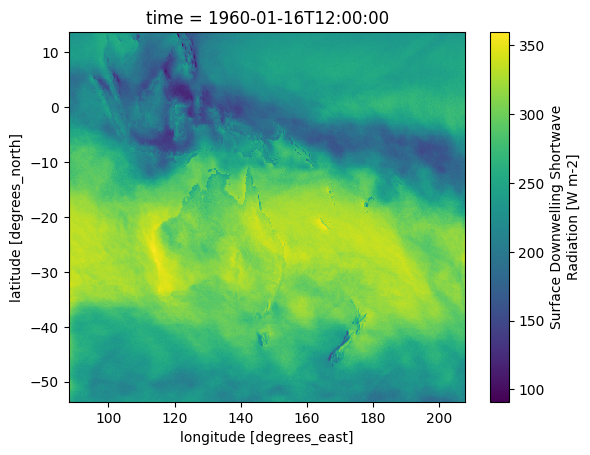

In [42]:
dn.rsds.isel(time=0).plot()

### Get new bounds

In [43]:
lat_min, lat_max = dn.lat.min().item(), dn.lat.max().item()
lon_min, lon_max = dn.lon.min().item(), dn.lon.max().item()

print(f"Latitude bounds: {lat_min} to {lat_max}")
print(f"Longitude bounds: {lon_min} to {lon_max}")


Latitude bounds: -53.5755 to 13.632
Longitude bounds: 88.0355 to 207.9275


### Replot using Robinson Projection

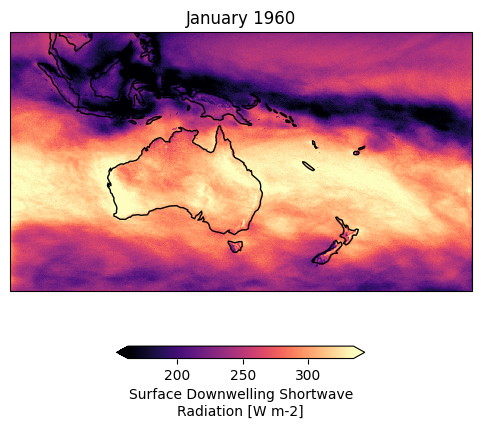

In [44]:
fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180)))

dn.rsds.isel(time=0).plot(
    ax=axis,
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"orientation": "horizontal", "shrink": 0.5},
    robust=True,
    cmap="magma"
)


axis.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
axis.coastlines()
axis.set_title("January 1960")
plt.show()


### Plot for NSW

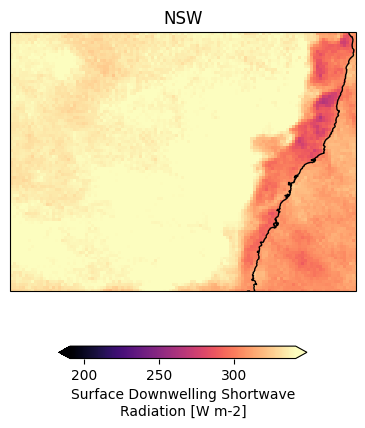

In [45]:
fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180)))

ds.rsds.plot(
    ax=axis,
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"orientation": "horizontal", "shrink": 0.5},
    robust=True,
    cmap="magma"
)


axis.set_extent([lon_minf, lon_maxf, lat_minf, lat_maxf], crs=ccrs.PlateCarree())
axis.coastlines()
axis.set_title("NSW")
plt.show()


### Let's try reading all files

In [46]:
base_url = "https://thredds.nci.org.au/thredds/dodsC/py18/BARPA/output/CMIP6/DD/AUS-15/BOM/ACCESS-CM2/historical/r4i1p1f1/BARPA-R/v1-r1/mon/rsds/latest/"
files = [f"rsds_AUS-15_ACCESS-CM2_historical_r4i1p1f1_BOM_BARPA-R_v1-r1_mon_{year}01-{year}12.nc" for year in range(1960, 1965)]  # Adjust years or filenames as needed


In [47]:
files

['rsds_AUS-15_ACCESS-CM2_historical_r4i1p1f1_BOM_BARPA-R_v1-r1_mon_196001-196012.nc',
 'rsds_AUS-15_ACCESS-CM2_historical_r4i1p1f1_BOM_BARPA-R_v1-r1_mon_196101-196112.nc',
 'rsds_AUS-15_ACCESS-CM2_historical_r4i1p1f1_BOM_BARPA-R_v1-r1_mon_196201-196212.nc',
 'rsds_AUS-15_ACCESS-CM2_historical_r4i1p1f1_BOM_BARPA-R_v1-r1_mon_196301-196312.nc',
 'rsds_AUS-15_ACCESS-CM2_historical_r4i1p1f1_BOM_BARPA-R_v1-r1_mon_196401-196412.nc']

### Create full urls and read with xarray

In [48]:
opendap_urls = [f"{base_url}{file}" for file in files]

In [49]:
da = xr.open_mfdataset(opendap_urls, combine='by_coords')

/var/folders/1b/bc6fxw656wg74gs3v20brtzc0000gn/T/ipykernel_78498/2717353056.py:1: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set data_vars explicitly.
  da = xr.open_mfdataset(opendap_urls, combine='by_coords')


In [50]:
da

<xarray.Dataset> Size: 163MB
Dimensions:    (time: 60, bnds: 2, lat: 436, lon: 777)
Coordinates:
  * time       (time) datetime64[ns] 480B 1960-01-16T12:00:00 ... 1964-12-16T...
  * lat        (lat) float64 3kB -53.58 -53.42 -53.27 ... 13.32 13.48 13.63
  * lon        (lon) float64 6kB 88.04 88.19 88.34 88.5 ... 207.6 207.8 207.9
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 960B dask.array<chunksize=(12, 2), meta=np.ndarray>
    crs        (time) int32 240B -2147483647 -2147483647 ... -2147483647
    rsds       (time, lat, lon) float64 163MB dask.array<chunksize=(12, 436, 777), meta=np.ndarray>
Attributes: (12/62)
    axiom_version:                   0.1.0
    axiom_schemas_version:           0.1.0
    axiom_schema:                    cordex-1M.json
    Conventions:                     CF-1.11, ACDD-1.3
    activity_id:                     DD
    title:                           Bureau of Meteorology Atmospheric Region...
    ...                              ...
    geospatial_lat_units:            degrees_north
    geospatial_lon_min:              88.0355
    geospatial_lon_max:              207.9275
    geospatial_lon_units:            degrees_east
    history:                         Thu Jun 20 09:43:23 2024: /g/data/access...
    DODS_EXTRA.Unlimited_Dimension:  time

### Calculate the mean and do a quick plot

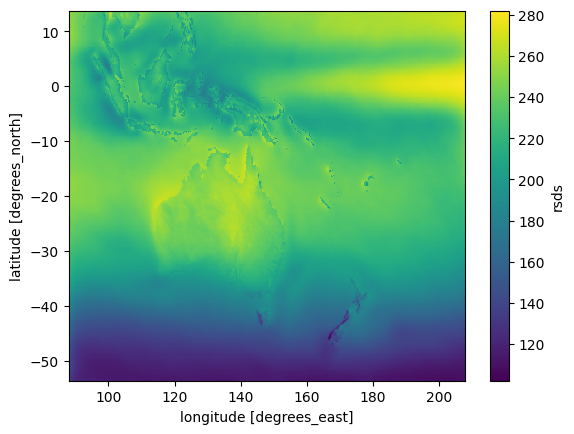

In [51]:
da.rsds.mean('time').plot()

### Let's do a seasonal mean plot

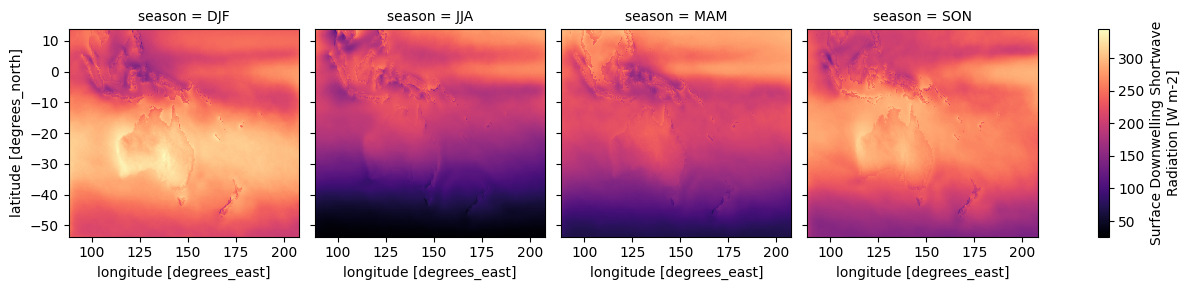

In [52]:
da.rsds.groupby('time.season').mean().plot(x="lon", y="lat", col="season", col_wrap=4, cmap="magma")

### Modify for NSW and plot seasonal means

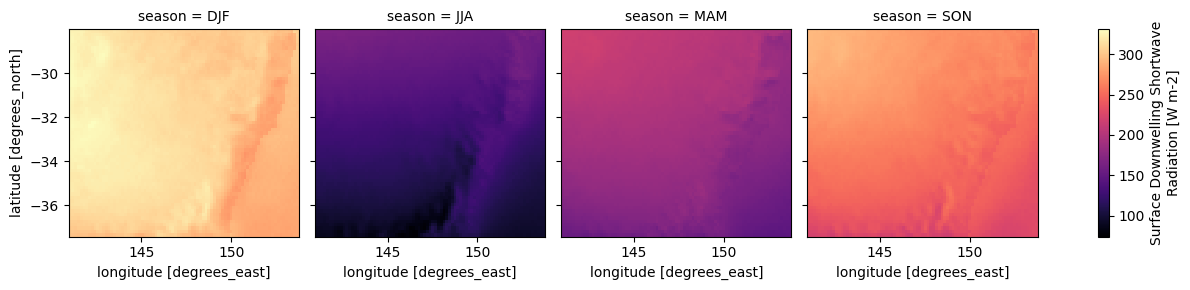

In [53]:
# Slice the DataArray by lat and lon
region = da.rsds.sel(lat=slice(lat_minf, lat_maxf), lon=slice(lon_minf, lon_maxf))

region.groupby('time.season').mean().plot(x="lon", y="lat", col="season", col_wrap=4, cmap="magma")

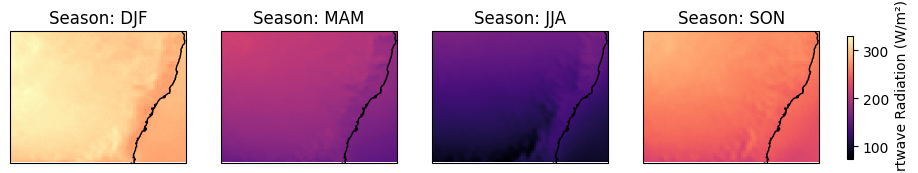

In [54]:

# Group by season and calculate the mean
seasonal_means = region.groupby('time.season').mean()


# Get global min and max values across all seasons for a common color scale
vmin = seasonal_means.min().compute()
vmax = seasonal_means.max().compute()

# Create the plot
fig, axes = plt.subplots(
    nrows=1, ncols=4,
    figsize=(12, 8),
    subplot_kw={"projection": ccrs.PlateCarree(central_longitude=180)}  # Dateline-centered
)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Seasons order in xarray
seasons = ["DJF", "MAM", "JJA", "SON"]

# Plot each season
for i, season in enumerate(seasons):
    ax = axes[i]
    
    # Select data for the specific season
    data = seasonal_means.sel(season=season)
    
    # Plot the data with shared vmin and vmax for a common color scale
    img = data.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap="magma",
        add_colorbar=False,  # Disable individual colorbars
        vmin=vmin,
        vmax=vmax,
    )
    
    # Add coastlines and title
    ax.coastlines()
    ax.set_title(f"Season: {season}")
    ax.set_extent([lon_minf, lon_maxf, lat_minf, lat_maxf], crs=ccrs.PlateCarree())

# Remove extra subplot axes (if any)
for j in range(len(seasons), len(axes)):
    fig.delaxes(axes[j])

# Add a single shared colorbar
cbar = fig.colorbar(
    img, ax=axes, orientation="vertical", shrink=0.2, fraction=0.1, pad=0.03, aspect=20
)
cbar.set_label("Shortwave Radiation (W/m²)")  # Customize the label


plt.show()

